# The Spark Foundation #GRIPJULY2021

# Task-2 Prediction using Unsupervised ML

# By:Adhithyan.B

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
#Reading the data from remote link
#link='https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'

data=pd.read_csv('Iris.csv')
print('Data has been imported')

Data has been imported


In [3]:
#Returns the first 5 values
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
#Returns the last 5 values
print(data.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [5]:
#Checking for nan values
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
#Describes the given dataset 
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
#Gives the information about the given dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [8]:
#Prints the unique data of the column Species
print(data.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
#Prints the total values present in Species column
print(data.Species.value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


# Data Visualization

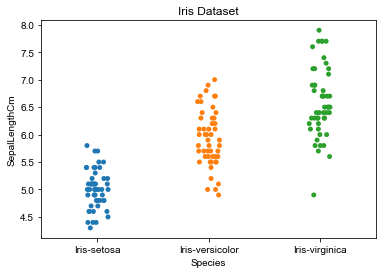

In [10]:
#Using Strip plot to compare the Species and sepal length(cm)
sns.stripplot(x='Species',y='SepalLengthCm',data=data)
plt.title('Iris Dataset')
sns.set(style='whitegrid')


Text(0.5, 1.0, 'Iris Dataset')

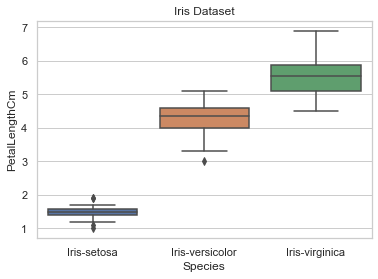

In [11]:
#Using boxplot to compare species and petal length(cm)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.title('Iris Dataset')

Text(0.5, 1.0, 'Count of Species')

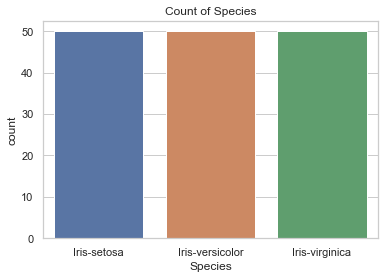

In [12]:
#Using countplot to count the total no of individiual species
sns.countplot(x='Species',data=data)
plt.title('Count of Species')

In [13]:
# Finding the optimum number of clusters using k-means clustering

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    #appending the wcss to the list(kmeans.intertia_ returns the wcss value for initialized cluster
    wcss.append(kmeans.inertia_)
    print('K:',i,'wcss',kmeans.inertia_)
    


K: 1 wcss 281831.54466666654
K: 2 wcss 70581.3808
K: 3 wcss 31320.711199999994
K: 4 wcss 17762.657226173542
K: 5 wcss 11423.238080088988
K: 6 wcss 7909.5306730769225
K: 7 wcss 5881.448116883118
K: 8 wcss 4562.780079365082
K: 9 wcss 3579.7205612745106
K: 10 wcss 2968.4914326653743


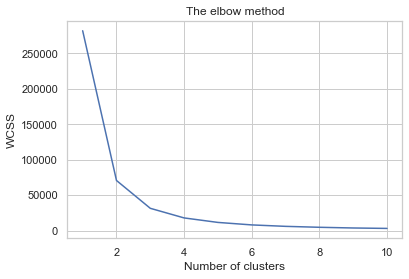

In [14]:
# Plotting the results onto a line graph,allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [15]:
#Fitting the K-Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
#Returns a label for each data point based on no of clusters
y_kmeans=kmeans.fit_predict(x)

In [16]:
#Predicting the values
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Petal length in cm')

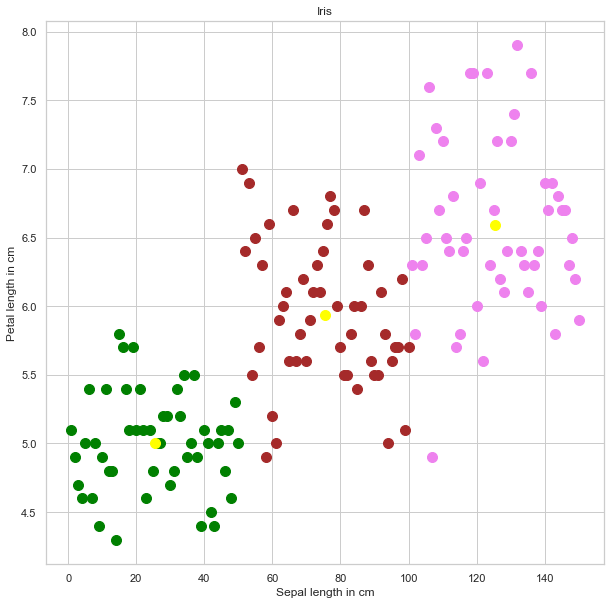

In [18]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
